In [5]:
# mount driver
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CardiacSeg

# install dependents
!pip install -q "monai-weekly[nibabel, tqdm, einops]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1jz_DGnICBmKWCr_JL904PDQdIEK0_EQG/CardiacSeg
     |████████████████████████████████| 1.0 MB 27.2 MB/s 


In [21]:
import os

from monai.transforms import (
    Compose,
    LoadImaged,
    LabelFilterd,
    MapLabelValued,
    AddChanneld,
    Orientationd,
    Spacingd,
    ScaleIntensityRanged,
    CropForegroundd
)
import matplotlib.pyplot as plt

from data_utils.segthor_dataset import SegTHORDataset

In [9]:
class Config:
  root_dir = './detection'
  data_dir = './dataset/SegTHOR/train'

config = Config

In [16]:
ds = SegTHORDataset(config.data_dir)
data_dicts = ds.get_data_dicts()
data_dict = data_dicts[0]
data_dict

{'image': './dataset/SegTHOR/train/Patient_01/Patient_01.nii.gz',
 'label': './dataset/SegTHOR/train/Patient_01/GT.nii.gz'}

In [42]:
pre_process = Compose([
    LoadImaged(keys=['image', 'label']),
    LabelFilterd(keys=["label"], applied_labels=[2]),
    MapLabelValued(keys=["label"], orig_labels=[0,2], target_labels=[0,1]),
    AddChanneld(keys=["image", "label"]),
    Orientationd(keys=["image", "label"], axcodes="RAS"),
    CropForegroundd(
        keys=['image','label'],
        source_key='label',
        return_coords=True
    )
])

In [43]:
data = pre_process(data_dict)

In [44]:
data['foreground_start_coord']

array([178, 239,  80])

In [45]:
data['foreground_end_coord']

array([319, 371, 120])

In [40]:
data['image'].shape

(1, 141, 132, 40)

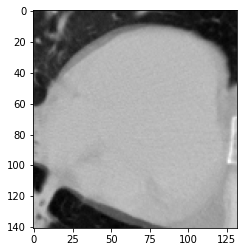

In [46]:
plt.imshow(data['image'][0,:,:,20], cmap='gray')